<a href="https://colab.research.google.com/github/Reis25/AprendizadoDeMquinas/blob/master/Lista5_AM_DemetriosReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista de Exercícios: Árvore de Decisão – Parte 1

Disciplina: Aprendizagem de Máquina, PPGI

Professores: Evandro Costa e Xu Yang

Período: 2020.2


1) Considere o conjunto de treinamento expresso na tabela a seguir, sobre o qual
responda:

a Use o algoritmo ID3, adotando a métrica do ganho de informação para seleção de
atributos, para construir completamente e manualmente uma árvore de decisão. Mostre
o passo a passo o processo de construção da árvore, apresentando os cálculos com os
valores (entropia, ganho de informação), critério e justificativa de escolha para cada
atributo candidato a ser raiz de árvore (e cada subárvore), em cada momento;


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from math import log
import seaborn as sns

url1 = 'https://raw.githubusercontent.com/Reis25/Testes_py/master/risco_de_credito.csv'

df = pd.read_csv(url1)

df.head()

,Historia_de_Crédito,Dívida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,baixa,Alto
1,Desconhecida,Alta,Nenhuma,media,Alto
2,Desconhecida,Baixa,Nenhuma,media,Moderado
3,Desconhecida,Baixa,Nenhuma,baixa,Alto
4,Desconhecida,Baixa,Nenhuma,alta,Baixo


In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['Historia_de_Crédito'] = Le.fit_transform(df['Historia_de_Crédito'])
df['Dívida'] = Le.fit_transform(df['Dívida'])
df['Garantia'] = Le.fit_transform(df['Garantia'])
df['Renda'] = Le.fit_transform(df['Renda'])
df['Risco'] = Le.fit_transform(df['Risco'])

y = df['Risco']
X = df.drop(['Risco'], axis=1)

In [7]:
y 
X  

,Historia_de_Crédito,Dívida,Garantia,Renda
0,2,0,1,1
1,1,0,1,2
2,1,1,1,2
3,1,1,1,1
4,1,1,1,0
5,1,1,0,0
6,2,1,1,1
7,2,1,0,0
8,0,1,1,0
9,0,0,0,0


In [8]:
# Fitting the model
from sklearn import tree

# criterion = 'entropy' calcula a árvore de decisão pelo ID3
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

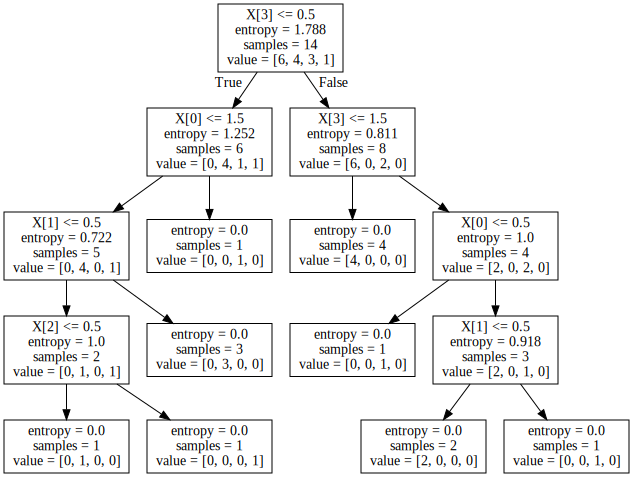

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

b Use o algoritmo C4.5, portanto adotando a métrica Razão de Ganho para seleção de
atributos, para construir, completamente, a árvore de decisão. Mostre o passo a passo o
processo de construção da árvore, apresentando os cálculos com os valores (entropia,
ganho de informação, razão de ganho), critério e justificativa de escolha para cada
atributo candidato a ser raiz de árvore (e cada subárvore), em cada momento;



No algoritmo ID3, calculamos ganhos para cada atributo. Aqui, precisamos calcular as taxas de ganho em vez de ganhos.

taxaDeGanho (A) = Ganho (A) / SplitInfo (A)

SplitInfo (A) = -∑ | Dj | / | D | x log2 | Dj | / | D |

Daí aplica-se em todos os atributos da árvore e pega a maior taxa e constroi de forma sequencial com as inferências. 

In [11]:
# Fitting the model
from sklearn import tree

# Deixar sem parametro por default temos uma classificação pelo C4.5
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [12]:
# Fitting the model
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X, y)

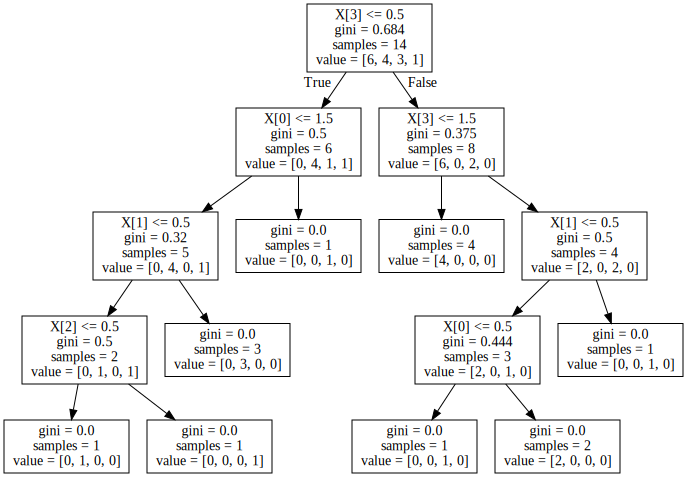

In [13]:
dot_data2 = tree.export_graphviz(clf2, out_file=None) 
graph1 = graphviz.Source(dot_data2) 
graph1


c Discuta os resultados obtidos em a e b, comparando-os;



Basicamente todos os problemas resolvíveis com o ID3 podem ser resolvidos com o C4.5, a diferença formal entre eles é que ao invez de ganho como usa o ID3 ele (o C4.5) usa taxa de ganho , dessa forma evita o overfitting. No mais o tratamento de dados é feito da mesmo 

d Rode, em alguma biblioteca de AM de sua preferência, os algoritmos de AD para a e
b, comparando as soluções obtidas com as que você desenvolveu manualmente;


e Na AD a ser obtida pela aplicação do algoritmo ID3, tal como no item a desta questão,
dos 4 atributos do CT, um deles não vai aparecer nela, ficando apenas 3 na AD
construída. Assim: informe qual foi o atributo e justifique o porquê disso ter acontecido.

R: Temperature, pois qual fosse a variável AD achou um padrão que era cumprida não levando a mesma em consideração.

2) Considere o conjunto de treinamento, tendo 4 atributos e mais o atributo classificador PlayTennis, expresso na tabela a seguir, respondendo às seguintes questões: 

a) Construa manualmente, completamente, uma árvore de decisão, considerando o atributo Wind como raiz da árvore principal e para as demais árvores (sub-árvores) escolha a raiz por um critério de sorteio; 



1- Calculando a entropia dos dados:

Temos 14 instâncias totais: 9 instâncias de SIM 5 instâncias de NÃO. Com as contagens de frequência de cada classe única, podemos calcular a entropia anterior desse conjunto de dados em que:

p = número de instâncias positivas (por exemplo, número de instâncias de tênis)

n = número de instâncias negativas (por exemplo, número de pessoas que não jogam tênis)

= -[(p/(p+n))log2(p/(p+n)) + (n/(p+n))log2(n/(p+n))]

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(9/(9+5))log2(9/(9+5)) + -(5/(9+5))log2(5/(9+5))

= -(9/(9+5))log2(9/(9+5)) + -(5/(9+5))log2(5/(9+5))

= 0.9403

2- Calculando o ganho de informação em cada atributo:

= (5/14)Isunny(p,n) + (4/14)Iovercast(p,n) + (5/14)*Irainy(p,n)

Isunny(p,n)

= I(2,3)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(2/(2+3))log2(2/(2+3)) + -(3/(2+3))log2(3/(2+3))

= 0.9710

Iovercast(p,n)

= I(4,0)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(4/(4+0))log2(4/(4+0)) + -(0/(4+0))log2(0/(4+0))

= 0

Irainy(p,n)

= I(3,2)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(3/(3+2))log2(3/(3+2)) + -(2/(3+2))log2(2/(3+2))

= 0.9710

Calculando a entropia para o Outlook =

= [Soma ponderada das pontuações de entropia de cada subconjunto de valor de atributo]

= (5/14)Isunny(p,n) + (4/14)Iovercast(p,n) + (5/14)*Irainy(p,n)

= (5/14) (0.9710) + (4/14) 0 + (5/14) * (0.9710)

= 0.6936

Daí a entropia resultante é dada por:

= 0.9403 – 0.6936

= 0.246

Entropia para Temperature = 0.911

Entropia para Humidity = 0.789

Entropia para Wind = 0.892

Ganho de informação para o atributo: Temperature = 0.9403 – 0.911 = 0.0293

Ganho de informação para o atributo: Humidity = 0.9403 – 0.789 = 0.1513

Ganho de informação para o atributo: Wind = 0.9403 – 0.892 = 0.0483

3- calcular o atributo que obteve o máximo de informações:

Fácil concluir que a raiz será por outlook

4- Particionar o conjunto de dados com base nos valores do atributo que obteve o máximo de informações, assim:


b) outlook -> Overcast -> Yes

b) Discuta o resultado obtido em a), relativamente ao obtido com a AD construída seguindo o algoritmo ID3 sobre esse conjunto de treinamento; Obs.: Para a construção com ID3 considere a parte já feita em sala de aula, complementando- a nos níveis restantes, mostrando os respectivos cálculos. 


c) Rode, em alguma biblioteca de AM de sua preferência, o algoritmo C4.5 sobre esse conjunto de treinamento, comparando a AD obtida com a obtida pelo algoritmos ID3.

In [14]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import log

url2 = 'https://raw.githubusercontent.com/Reis25/Testes_py/master/jogar_tenis.csv'

data_frame = pd.read_csv(url2)

data_frame.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTenis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data_frame['Outlook'] = Le.fit_transform(data_frame['Outlook'])
data_frame['Temperature'] = Le.fit_transform(data_frame['Temperature'])
data_frame['Humidity'] = Le.fit_transform(data_frame['Humidity'])
data_frame['Wind'] = Le.fit_transform(data_frame['Wind'])
data_frame['PlayTenis'] = Le.fit_transform(data_frame['PlayTenis'])

In [16]:
data_frame = data_frame.drop(['Day'], axis=1)

In [17]:
data_frame.head()

,Outlook,Temperature,Humidity,Wind,PlayTenis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [18]:
y = data_frame['PlayTenis']

X = data_frame.drop(['PlayTenis'], axis=1)

In [20]:
X 


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [21]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTenis, dtype: int64

In [22]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

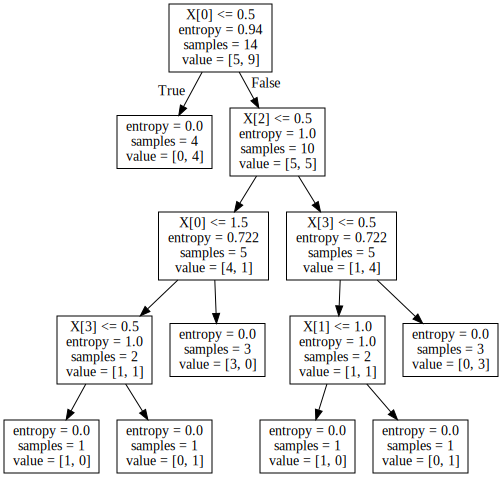

In [24]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

X[0] -> Outlook

X[1] -> Temperature

X[2] -> Humidity

X[3] -> Wind

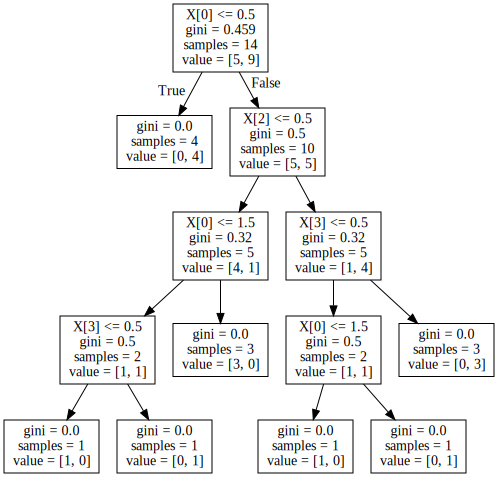

In [27]:
# Fitting the model
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)

dot_data2 = tree.export_graphviz(clf2, out_file=None) 
graph1 = graphviz.Source(dot_data2) 
graph1

In [29]:
# Verificando a construção
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: PlayTenis, dtype: bool